In [163]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import ast
from func import * 
import math
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [26]:
df = pd.read_csv("merged_df.csv")

In [27]:
df.drop(columns=['bbox_id','keypoints','area'], inplace=True)
df["image_id"] = df["image_id"].astype(str).apply(lambda x: x.rjust(12, '0') + ".jpg")
df['bbox'] = df['bbox'].apply(ast.literal_eval)
df['image_file'] = str('val2017/')+df['image_id']
df.drop(columns='image_id', inplace=True)

In [124]:
def img_metric(img_path):
    # bbox 하나만 가져오기
    bbox = df[df['image_file']== img_path]['bbox'].iloc[0]

    # bbox 정보에서 x, y, w, h 추출
    x, y, w, h = map(int, bbox)

    # 이미지를 bbox에 맞게 자르기
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    cropped_image = image[y:y+h, x:x+w]
    c_moment_value = moment(cropped_image)
    return c_moment_value, cropped_image

In [125]:
c_moment_value, cropped_image = img_metric('val2017/000000003934.jpg')
c_moment_value

(14, 55)

In [129]:
def visualize_points(img_path):
    c_moment_value, cropped_image = img_metric(img_path)
    print(c_moment_value)
    x, y = map(int, c_moment_value)

    # # OpenCV 창에서 이미지 보기
    # cv2.imshow('Image with Points', cropped_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Matplotlib을 사용하여 이미지 보기
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.scatter(x, y, color='red', s=30)  # 빨간색으로 점 찍기
    plt.axis(False)
    plt.show()

(14, 55)


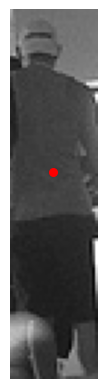

In [130]:
# crop된 이미지(bbox)에서 centroid moment좌표
visualize_points('val2017/000000003934.jpg')

In [131]:
img.shape

(500, 375)

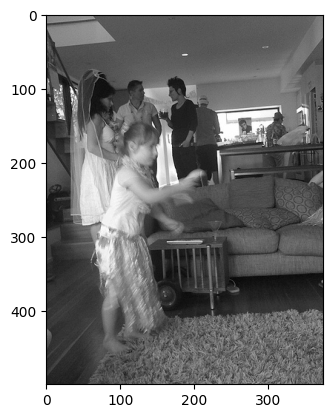

In [128]:
# original image
img = cv2.imread('val2017/000000003934.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [148]:
# centroid moment와 이미지 중심좌표가 어느정도 떨어져 있는지에 대한 정도 
def centroid_degree(w, h, cx, cy):

    # 이미지 중심 좌표 계산
    center_x = w // 2
    center_y = h // 2

    l = math.sqrt(((center_x-cx)/w)**2+((center_y-cy)/h)**2)
    
    return l

In [149]:
centroid_l = []

for i in range(len(df)):
    bbox = df.loc[i,'bbox']
    
    # bbox 정보에서 x, y, w, h 추출
    x, y, w, h = map(int, bbox)

    # 이미지 로드
    image_file_path = df.loc[i,'image_file']
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)

    height, width= image.shape
    img_size_value = width * height

    # 이미지를 bbox에 맞게 자르기
    cropped_image = image[y:y+h, x:x+w]
    cx, cy = moment(cropped_image)
    centroid_l_value = centroid_degree(w, h, cx, cy)


    centroid_l.append(centroid_l_value)

In [152]:
df['centroid_l'] = centroid_l

In [176]:
sorted_df = df.sort_values(by='score', ascending=False, ignore_index=True)

In [177]:
high_score = sorted_df[sorted_df['score']>0.85]
low_score = sorted_df[sorted_df['score']<0.6]

<Axes: title={'center': 'centroid moment와 거리 중심 떨어져 있는 정도 (전체 bbox 이미지 score 정렬 )'}>

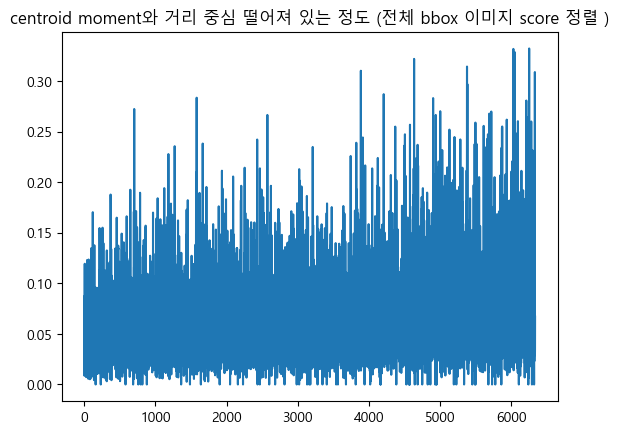

In [178]:
plt.title("centroid moment와 거리 중심 떨어져 있는 정도 (전체 bbox 이미지 score 정렬 )")
sorted_df['centroid_l'].plot()

<Axes: title={'center': 'low score centroid_l'}>

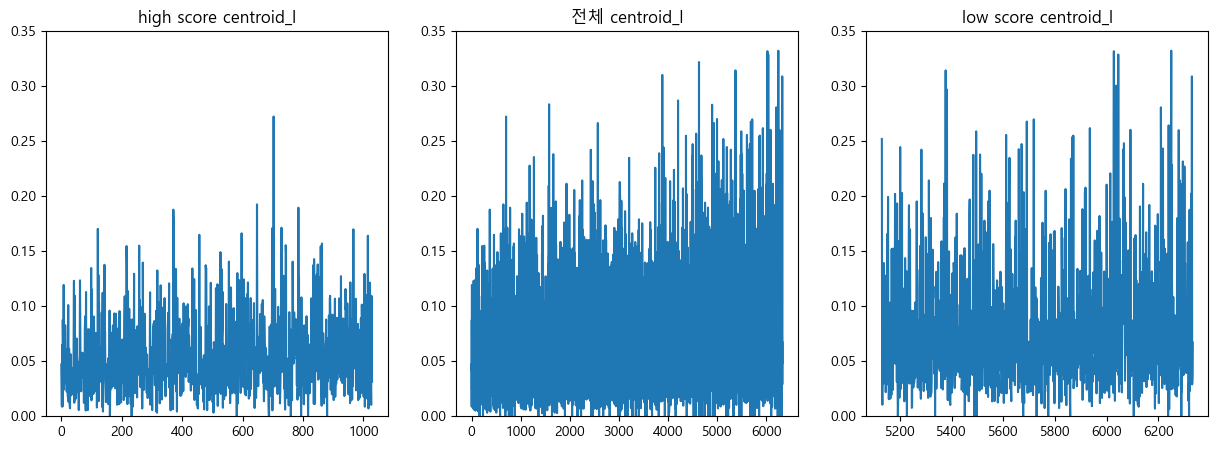

In [179]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("high score centroid_l")
plt.ylim(0,0.35)
high_score['centroid_l'].plot()

plt.subplot(1,3,2)
plt.title("전체 centroid_l")
plt.ylim(0,0.35)
sorted_df['centroid_l'].plot()

plt.subplot(1,3,3)
plt.title("low score centroid_l")
plt.ylim(0,0.35)
low_score['centroid_l'].plot()

In [184]:
high_score['centroid_l'].describe()

count    1030.000000
mean        0.054598
std         0.034910
min         0.000000
25%         0.028277
50%         0.047070
75%         0.073877
max         0.272490
Name: centroid_l, dtype: float64

In [186]:
sorted_df['centroid_l'].describe()

count    6334.000000
mean        0.067895
std         0.044793
min         0.000000
25%         0.035701
50%         0.058824
75%         0.088967
max         0.332341
Name: centroid_l, dtype: float64

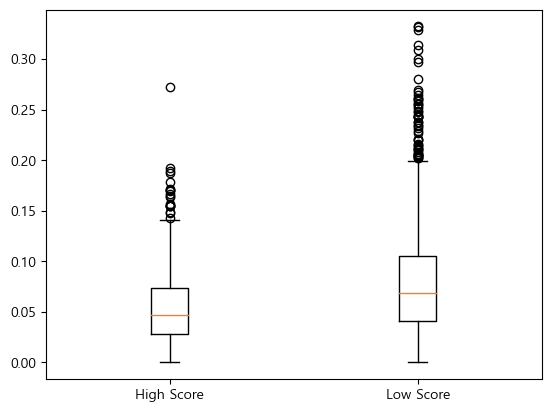

In [181]:
plt.boxplot([high_score['centroid_l'], low_score['centroid_l']], labels=['High Score', 'Low Score'])
plt.show()